## Data Loading

In [3]:
import pandas as pd
import numpy as np
import re
import datetime as dt

In [4]:
import os
os.chdir('C:\\Users\\megan.lieu')

In [454]:
herndon_data = pd.read_csv('zillow_herndon (1).csv')
reston_data = pd.read_csv('zillow-reston (1).csv')
ashburn_data = pd.read_csv('zillow-ashburn (1).csv')
sterling_data = pd.read_csv('zillow-sterling.csv')
fallschurch_data = pd.read_csv('zillow_fallschurch.csv')
vienna_data = pd.read_csv('zillow_vienna.csv')
fairfax_data = pd.read_csv('zillow_fairfax.csv')
manassas_data = pd.read_csv('zillow_manassas.csv')
chantilly_data = pd.read_csv('zillow_chantilly.csv')
centreville_data = pd.read_csv('zillow_centreville.csv')
arlington_data = pd.read_csv('zillow_arlington.csv')
alexandria_data = pd.read_csv('zillow_alexandria.csv')
annandale_data = pd.read_csv('zillow_annandale.csv')
mclean_data = pd.read_csv('zillow_mclean.csv')
greatfalls_data = pd.read_csv('zillow_greatfalls.csv')
springfield_data = pd.read_csv('zillow_springfield.csv')

In [455]:
merged_housing_data = pd.concat([ashburn_data, herndon_data, reston_data, sterling_data, fallschurch_data, vienna_data, fairfax_data, manassas_data, chantilly_data, centreville_data, arlington_data, alexandria_data, annandale_data, mclean_data, greatfalls_data, springfield_data])

In [72]:
merged_housing_data

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,linking_list,linking_list-href
0,1640747444-69,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,from,3,2,"2,500",NaN,"Buildable plan: Hudson, Downtown Brambleton, A...","$3,489/mo",Townhouse,Built in 2021,$286 price/sqft,NaN,NaN
1,1640747422-67,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/20695-Glenm...,"$811,650",3,4,"2,385","$810,900","20695 Glenmont Ter, Ashburn, VA 20147","$3,923/mo",Townhouse,Built in 2021,$340 price/sqft,NaN,NaN
2,1640747413-66,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,from,3,2,"2,726",NaN,"Buildable plan: Manhattan, Downtown Brambleton...","$3,612/mo",Townhouse,Built in 2021,$273 price/sqft,NaN,NaN
3,1640747398-65,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/20434-Cool-...,"$499,900",4,4,"1,910","$502,500","20434 Cool Fern Sq, Ashburn, VA 20147","$2,414/mo",Townhouse,Built in 1998,$262 price/sqft,NaN,NaN
4,1640747499-73,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/23090-Dunlo...,"$620,000",4,4,"1,854","$574,400","23090 Dunlop Heights Ter, Ashburn, VA 20148","$2,954/mo",Townhouse,Built in 2010,$334 price/sqft,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1641078704-173,"https://www.zillow.com/homes/McLean,-VA_rb/",NaN,https://www.zillow.com/community/pci-22101/209...,from,5,4,"3,100",NaN,"Buildable plan: 1830 Hileman, PCI - 22101, McL...","$7,575/mo",Singlefamily,Built in 2022,$544 price/sqft,NaN,NaN
5,1641078781-178,"https://www.zillow.com/homes/McLean,-VA_rb/",NaN,https://www.zillow.com/homedetails/1944-Kirby-...,"$1,197,000",5,3,"3,100","$1,238,300","1944 Kirby Rd, McLean, VA 22101","$5,374/mo",Single family residence,Built in 1955,$386 price/sqft,NaN,NaN
6,1641078809-180,"https://www.zillow.com/homes/McLean,-VA_rb/",NaN,https://www.zillow.com/homedetails/6719-Danfor...,"$2,390,000",6,7,"7,100",NaN,"6719 Danforth St, McLean, VA 22101","$10,729/mo",Single family residence,"Programmable thermostat, natural gas",NaN,NaN,NaN
7,1641078720-174,"https://www.zillow.com/homes/McLean,-VA_rb/",NaN,https://www.zillow.com/homedetails/1151-Randol...,"$840,000",4,4,"1,512",NaN,"1151 Randolph Rd, McLean, VA 22101","$3,933/mo",Townhouse,Built in 1967,"1,742 sqft",NaN,NaN


## Data Cleaning

In [456]:
merged_housing_data['Est_pmt']=merged_housing_data['Est_pmt'].str.replace('/mo','')
merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace('$','')
merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace(',','')

merged_housing_data['Sqft']=merged_housing_data['Sqft'].str.replace(',','')
merged_housing_data["Sqft"] = merged_housing_data["Sqft"].apply(pd.to_numeric)

merged_housing_data['Zestimate'] = merged_housing_data['Zestimate'].str.replace('$','')
merged_housing_data['Zestimate'] = merged_housing_data['Zestimate'].str.replace(',','')
merged_housing_data['Zestimate'] = merged_housing_data['Zestimate'].apply(pd.to_numeric)

merged_housing_data['Price'] = merged_housing_data['Price'].str.replace('$','')
merged_housing_data['Price'] = merged_housing_data['Price'].str.replace(',','')
merged_housing_data['Price'] = merged_housing_data['Price'].replace('from', np.NaN)
merged_housing_data['Price'] = merged_housing_data['Price'].apply(pd.to_numeric)

merged_housing_data['No_bd'] = merged_housing_data['No_bd'].apply(pd.to_numeric)
merged_housing_data['No_ba'] = merged_housing_data['No_ba'].apply(pd.to_numeric)

merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace('$','')
merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace(',','')
merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace('/mo','')
merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].apply(pd.to_numeric)

<ipython-input-456-99df8164eb31>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace('$','')
<ipython-input-456-99df8164eb31>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged_housing_data['Zestimate'] = merged_housing_data['Zestimate'].str.replace('$','')
<ipython-input-456-99df8164eb31>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged_housing_data['Price'] = merged_housing_data['Price'].str.replace('$','')
<ipython-input-456-99df8164eb3

In [457]:
merged_housing_data[merged_housing_data['Price'].isna()]
# merged_housing_data['Address'][merged_housing_data['web-scraper-order']=='1641069999-143'].to_clipboard()

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,linking_list,linking_list-href
0,1640747444-69,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,NaN,3,2,2500,NaN,"Buildable plan: Hudson, Downtown Brambleton, A...",3489,Townhouse,Built in 2021,$286 price/sqft,NaN,NaN
2,1640747413-66,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,NaN,3,2,2726,NaN,"Buildable plan: Manhattan, Downtown Brambleton...",3612,Townhouse,Built in 2021,$273 price/sqft,NaN,NaN
5,1640747472-71,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/demott-silver...,NaN,3,3,2708,777900.0,"Buildable plan: Mayfair, Demott & Silver, Ashb...",3682,Townhouse,Built in 2021,$287 price/sqft,NaN,NaN
6,1640747431-68,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/regency-at-be...,NaN,3,3,2953,NaN,"Buildable plan: Dylan, Regency at Belmont, Ash...",3280,Townhouse,Built in 2021,NaN,NaN,NaN
2,1640747588-76,https://www.zillow.com/herndon-va/3-_beds/2.0-...,NaN,https://www.zillow.com/community/foster-s-glen...,NaN,4,4,2022,NaN,"Buildable plan: Strauss, Foster's Glen, Herndo...",3301,Townhouse,Built in 2021,NaN,NaN,NaN
8,1640747676-82,https://www.zillow.com/herndon-va/3-_beds/2.0-...,NaN,https://www.zillow.com/community/liberty-park/...,NaN,3,3,2332,NaN,"Buildable plan: The Ryder, Liberty Park, Hernd...",3167,Townhouse,Built in 2021,NaN,NaN,NaN
7,1641069999-143,"https://www.zillow.com/homes/Falls-Church,-VA_rb/",NaN,NaN,NaN,4,5,5500,NaN,Buildable plan: Blue Diamond - Future Construc...,4485,Singlefamily,Built in 2022,NaN,NaN,https://www.zillow.com/community/by-botero-hom...
0,1641068098-108,"https://www.zillow.com/homes/Fairfax,-VA_rb/",NaN,https://www.zillow.com/community/park-at-fair-...,NaN,3,3,2345,NaN,"Buildable plan: The Julianne, Park at Fair Oak...",2965,Townhouse,Built in 2022,$281 price/sqft,NaN,NaN
2,1641067997-101,"https://www.zillow.com/homes/Fairfax,-VA_rb/",NaN,https://www.zillow.com/community/towns-at-pend...,NaN,3,4,2818,NaN,"Buildable plan: McDaniel I, The Towns at Pende...",4200,Townhouse,Built in 2022,$332 price/sqft,NaN,NaN
1,1641071651-170,"https://www.zillow.com/homes/Arlington,-VA_rb/",NaN,https://www.zillow.com/homedetails/2244-23rd-S...,NaN,3,5,2300,918500.0,"2244 23rd St S, Arlington, VA 22202",4288,Townhouse,"Energy star qualified equipment, natural gas",$407 price/sqft,NaN,NaN


In [464]:
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747431-68', "Price"] = 717995
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747588-76', "Price"] = 739990
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747676-82', "Price"] = 709990
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071670-171', "Price"] = 1714900
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641069999-143', "Price"] = 998500
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641078704-173', "Price"] = 1687324
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071651-170', "Price"] = 715900
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747413-66', "Price"] = 742900
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747472-71', "Price"] = 777865
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641068098-108', "Price"] = 659990
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641067997-101', "Price"] = 934990
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071651-170', "Price"] = 936125
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071551-165', "Price"] = 946175
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071613-168', "Price"] = 895000
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071629-169', "Price"] = 944335
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747444-69', "Price"] = 715900

In [465]:
merged_housing_data[merged_housing_data['Price'].isna()]

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,linking_list,linking_list-href


In [466]:
# merged_housing_data = merged_housing_data.drop(columns='Price_sqft2')
replacement = {
    "$": "",
    " price/sqft": ""
}

merged_housing_data['Price_sqft'] = merged_housing_data['Price_sqft'].replace(replacement,regex=True)
merged_housing_data['Price_sqft'] = merged_housing_data['Price_sqft'].str.replace("$", "")

# merged_housing_data['Price_sqft2'] = np.where(merged_housing_data['Price'].notna(), (merged_housing_data['Price']/merged_housing_data['Sqft']), merged_housing_data['Price_sqft'].replace(replacement,regex=True))
 

<ipython-input-466-72fffd217cc0>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged_housing_data['Price_sqft'] = merged_housing_data['Price_sqft'].str.replace("$", "")


In [467]:
merged_housing_data['Price_sqft2'] = np.where(merged_housing_data['Price'].notna(), (merged_housing_data['Price']/merged_housing_data['Sqft']), merged_housing_data['Price_sqft'])
merged_housing_data['Price_sqft2'] = np.where(merged_housing_data['Price_sqft']=='No data', (merged_housing_data['Price']/merged_housing_data['Sqft']), merged_housing_data['Price_sqft'])

merged_housing_data['Price_sqft2'] = np.where(merged_housing_data['Price_sqft2'].isna(), (merged_housing_data['Price']/merged_housing_data['Sqft']), merged_housing_data['Price_sqft2'])

In [468]:
merged_housing_data[merged_housing_data['Price_sqft2'].isna()]

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,linking_list,linking_list-href,Price_sqft2


In [469]:
merged_housing_data['Price_sqft2'] = merged_housing_data['Price_sqft2'].apply(pd.to_numeric).round(1)
# merged_housing_data[merged_housing_data['Price_sqft2']=='1,742 sqft']

In [470]:
# merged_housing_data[~merged_housing_data['Year_built'].str.contains('Built in')]
merged_housing_data.loc[~merged_housing_data['Year_built'].str.contains('Built in'), 'Year_built'] = 'Built in 2022'

In [471]:
def split_year(date):
    x = re.search('\d{4}', date)
    if x:
        return(x.group())
    
merged_housing_data['Year'] = merged_housing_data['Year_built'].apply(split_year)

In [472]:
merged_housing_data['Year'] = merged_housing_data['Year'].apply(pd.to_numeric)

In [473]:
merged_housing_data['Year'] = merged_housing_data['Year'].fillna(0)
merged_housing_data['Year'] = merged_housing_data.Year.astype(int)

In [474]:
merged_housing_data['Year'] = np.where(merged_housing_data['Year']==0, np.NaN, merged_housing_data['Year'])

In [475]:
merged_housing_data

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,linking_list,linking_list-href,Price_sqft2,Year
0,1640747444-69,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,715900.0,3,2,2500,NaN,"Buildable plan: Hudson, Downtown Brambleton, A...",3489,Townhouse,Built in 2021,286,NaN,NaN,286.0,2021.0
1,1640747422-67,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/20695-Glenm...,811650.0,3,4,2385,810900.0,"20695 Glenmont Ter, Ashburn, VA 20147",3923,Townhouse,Built in 2021,340,NaN,NaN,340.0,2021.0
2,1640747413-66,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,742900.0,3,2,2726,NaN,"Buildable plan: Manhattan, Downtown Brambleton...",3612,Townhouse,Built in 2021,273,NaN,NaN,273.0,2021.0
3,1640747398-65,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/20434-Cool-...,499900.0,4,4,1910,502500.0,"20434 Cool Fern Sq, Ashburn, VA 20147",2414,Townhouse,Built in 1998,262,NaN,NaN,262.0,1998.0
4,1640747499-73,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/23090-Dunlo...,620000.0,4,4,1854,574400.0,"23090 Dunlop Heights Ter, Ashburn, VA 20148",2954,Townhouse,Built in 2010,334,NaN,NaN,334.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1641259459-196,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/8527-Kentfo...,785000.0,5,3,1680,798100.0,"8527 Kentford Dr, Springfield, VA 22152",3546,Single family residence,Built in 1968,NaN,NaN,NaN,467.3,1968.0
5,1641259508-199,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/8801-Law-Ct...,875000.0,4,3,2791,875000.0,"8801 Law Ct, Springfield, VA 22152",3953,Single family residence,Built in 1967,NaN,NaN,NaN,313.5,1967.0
6,1641259446-195,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/7508-Mendot...,520000.0,4,2,1424,621300.0,"7508 Mendota Pl, Springfield, VA 22150",2366,Single family residence,Built in 1955,NaN,NaN,NaN,365.2,1955.0
7,1641259370-191,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/6600-Huntsm...,674900.0,4,3,2064,NaN,"6600 Huntsman Blvd, Springfield, VA 22152",3049,Single family residence,Built in 1966,NaN,NaN,NaN,327.0,1966.0


In [476]:
merged_housing_data = merged_housing_data.astype({'Est_pmt':'float'})
merged_housing_data = merged_housing_data.astype({'Sqft':'float'})
merged_housing_data = merged_housing_data.astype({'Address':'string'})
merged_housing_data = merged_housing_data.astype({'Townhouse':'string'})
merged_housing_data = merged_housing_data.astype({'Year_built':'string'})
merged_housing_data = merged_housing_data.astype({'Price_sqft':'string'})

In [482]:
merged_housing_data.dtypes

web-scraper-order         object
web-scraper-start-url     object
listing_link-href         object
Price                    float64
No_bd                      int64
No_ba                      int64
Sqft                     float64
Zestimate                float64
Address                   string
Est_pmt                  float64
Townhouse                 string
Year_built                string
Price_sqft2              float64
Year                     float64
City3                     string
dtype: object

In [478]:
def split_city(address):
    City = re.search('(.*), VA', address)
    if City:
        return(City.group(1))

merged_housing_data['City'] = merged_housing_data['Address'].apply(split_city)
merged_housing_data = merged_housing_data.astype({'City':'string'})

In [479]:
# merged_housing_data['City2'] = merged_housing_data['City'].apply(split_city2)
merged_housing_data[['Build', 'Street', 'City2']] = merged_housing_data['City'].str.split(',',expand=True)

merged_housing_data.loc[merged_housing_data['City2'].isna(), 'City3'] = 'na'

In [480]:
merged_housing_data['City3'] = np.where(merged_housing_data['City2'].isna(), merged_housing_data['City3'], merged_housing_data['City2'])
merged_housing_data['City3'] = np.where(merged_housing_data['City2'].notna(), merged_housing_data['City3'], merged_housing_data['Street'])

merged_housing_data = merged_housing_data.astype({'City3':'string'})

In [481]:
merged_housing_data = merged_housing_data.drop(columns=['listing_link', 'City', 'Build', 'Street', 'City2', 'linking_list', 'linking_list-href', 'Price_sqft'])

In [484]:
merged_housing_data = merged_housing_data.rename(columns = {'Price_sqft2':'Price_sqft'})
merged_housing_data = merged_housing_data.rename(columns = {'City3':'City'})

In [485]:
merged_housing_data['City'] = merged_housing_data['City'].str.replace('Mc Lean', 'McLean')

In [486]:
merged_housing_data['Price'] = np.where(merged_housing_data['Price'].isna() & merged_housing_data['Price_sqft'].notna(), (merged_housing_data['Sqft']*merged_housing_data['Price_sqft']), merged_housing_data['Price'])
merged_housing_data['Zestimate'] = np.where(merged_housing_data['Zestimate'].isna() & merged_housing_data['Price'].notna(), merged_housing_data['Price'], merged_housing_data['Zestimate'])

In [487]:
merged_housing_data.head()

,web-scraper-order,web-scraper-start-url,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,Year,City
0,1640747444-69,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/community/downtown-bram...,715900.0,3,2,2500.0,715900.0,"Buildable plan: Hudson, Downtown Brambleton, A...",3489.0,Townhouse,Built in 2021,286.0,2021.0,Ashburn
1,1640747422-67,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/20695-Glenm...,811650.0,3,4,2385.0,810900.0,"20695 Glenmont Ter, Ashburn, VA 20147",3923.0,Townhouse,Built in 2021,340.0,2021.0,Ashburn
2,1640747413-66,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/community/downtown-bram...,742900.0,3,2,2726.0,742900.0,"Buildable plan: Manhattan, Downtown Brambleton...",3612.0,Townhouse,Built in 2021,273.0,2021.0,Ashburn
3,1640747398-65,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/20434-Cool-...,499900.0,4,4,1910.0,502500.0,"20434 Cool Fern Sq, Ashburn, VA 20147",2414.0,Townhouse,Built in 1998,262.0,1998.0,Ashburn
4,1640747499-73,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/23090-Dunlo...,620000.0,4,4,1854.0,574400.0,"23090 Dunlop Heights Ter, Ashburn, VA 20148",2954.0,Townhouse,Built in 2010,334.0,2010.0,Ashburn


In [488]:
merged_housing_data.to_excel("merged_housing_data.xlsx")

## Creating final dataset

In [489]:
city_stats_dict = [
    {'City': 'Ashburn', 'City_population': 56377, 'City_med_income': 122687, 'City_med_age': 34.4},
    {'City': 'Herndon', 'City_population': 24573, 'City_med_income': 100399, 'City_med_age': 34.2},
    {'City': 'Alexandria', 'City_population': 158726, 'City_med_income': 87319, 'City_med_age': 35.8},
    {'City': 'Annandale', 'City_population': 44887, 'City_med_income': 78780, 'City_med_age': 37.6},
    {'City': 'Arlington', 'City_population': 240798, 'City_med_income': 105120, 'City_med_age': 33.8},
    {'City': 'Centreville', 'City_population': 75268, 'City_med_income': 103696, 'City_med_age': 34},
    {'City': 'Chantilly', 'City_population': 25015, 'City_med_income': 118991, 'City_med_age': 35.3},
    {'City': 'Fairfax', 'City_population': 23429, 'City_med_income': 100584, 'City_med_age': 39},
    {'City': 'Falls Church', 'City_population': 14631, 'City_med_income': 120500, 'City_med_age': 36.7},
    {'City': 'Great Falls', 'City_population': 15723, 'City_med_income': 229200, 'City_med_age': 45.4},
    {'City': 'Manassas', 'City_population': 40869, 'City_med_income': 71215, 'City_med_age': 32.6},
    {'City': 'Reston', 'City_population': 60871, 'City_med_income': 110321, 'City_med_age': 39},
    {'City': 'Sterling', 'City_population': 34324, 'City_med_income': 86968, 'City_med_age': 33},
    {'City': 'Vienna', 'City_population': 16518, 'City_med_income': 133776, 'City_med_age': 40.9},
    {'City': 'McLean', 'City_population': 47712, 'City_med_income': 188639, 'City_med_age': 46},
    {'City': 'Springfield', 'City_population': 30819, 'City_med_income': 89516, 'City_med_age': 37.8},
]

city_stats = pd.DataFrame(city_stats_dict)

In [490]:
# city_stats = city_stats.astype({'City':'string'})
city_stats.dtypes

City                object
City_population      int64
City_med_income      int64
City_med_age       float64
dtype: object

In [492]:
merged_housing_data['City'].dtypes == city_stats['City'].dtypes
merged_housing_data['City'] = merged_housing_data['City'].astype(str)
merged_housing_data['City'] = merged_housing_data['City'].str.strip()
final_housing_data = pd.merge(merged_housing_data, city_stats, on='City', how='left')
final_housing_data

,web-scraper-order,web-scraper-start-url,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,Year,City,City_population,City_med_income,City_med_age
0,1640747444-69,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/community/downtown-bram...,715900.0,3,2,2500.0,715900.0,"Buildable plan: Hudson, Downtown Brambleton, A...",3489.0,Townhouse,Built in 2021,286.0,2021.0,Ashburn,56377,122687,34.4
1,1640747422-67,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/20695-Glenm...,811650.0,3,4,2385.0,810900.0,"20695 Glenmont Ter, Ashburn, VA 20147",3923.0,Townhouse,Built in 2021,340.0,2021.0,Ashburn,56377,122687,34.4
2,1640747413-66,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/community/downtown-bram...,742900.0,3,2,2726.0,742900.0,"Buildable plan: Manhattan, Downtown Brambleton...",3612.0,Townhouse,Built in 2021,273.0,2021.0,Ashburn,56377,122687,34.4
3,1640747398-65,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/20434-Cool-...,499900.0,4,4,1910.0,502500.0,"20434 Cool Fern Sq, Ashburn, VA 20147",2414.0,Townhouse,Built in 1998,262.0,1998.0,Ashburn,56377,122687,34.4
4,1640747499-73,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/23090-Dunlo...,620000.0,4,4,1854.0,574400.0,"23090 Dunlop Heights Ter, Ashburn, VA 20148",2954.0,Townhouse,Built in 2010,334.0,2010.0,Ashburn,56377,122687,34.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1641259459-196,"https://www.zillow.com/homes/Springfield,-VA_rb/",https://www.zillow.com/homedetails/8527-Kentfo...,785000.0,5,3,1680.0,798100.0,"8527 Kentford Dr, Springfield, VA 22152",3546.0,Single family residence,Built in 1968,467.3,1968.0,Springfield,30819,89516,37.8
139,1641259508-199,"https://www.zillow.com/homes/Springfield,-VA_rb/",https://www.zillow.com/homedetails/8801-Law-Ct...,875000.0,4,3,2791.0,875000.0,"8801 Law Ct, Springfield, VA 22152",3953.0,Single family residence,Built in 1967,313.5,1967.0,Springfield,30819,89516,37.8
140,1641259446-195,"https://www.zillow.com/homes/Springfield,-VA_rb/",https://www.zillow.com/homedetails/7508-Mendot...,520000.0,4,2,1424.0,621300.0,"7508 Mendota Pl, Springfield, VA 22150",2366.0,Single family residence,Built in 1955,365.2,1955.0,Springfield,30819,89516,37.8
141,1641259370-191,"https://www.zillow.com/homes/Springfield,-VA_rb/",https://www.zillow.com/homedetails/6600-Huntsm...,674900.0,4,3,2064.0,674900.0,"6600 Huntsman Blvd, Springfield, VA 22152",3049.0,Single family residence,Built in 1966,327.0,1966.0,Springfield,30819,89516,37.8


In [493]:
final_housing_data.to_csv("final_housing_data.csv")

## EDA Visualizations

In [230]:
# !pip install hvplot

import matplotlib.pyplot as plt
import seaborn as sns
# import hvplot.pandas
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.pipeline import Pipeline
%matplotlib inline

In [494]:
final_housing_data.hvplot.hist('Price')

:Histogram   [Price]   (Price_count)

In [495]:
final_housing_data['Price'].describe()

count    1.430000e+02
mean     1.043646e+06
std      8.028568e+05
min      5.500000e+04
25%      6.175000e+05
50%      7.449900e+05
75%      9.994500e+05
max      5.160000e+06
Name: Price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


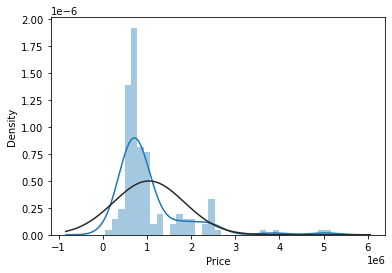

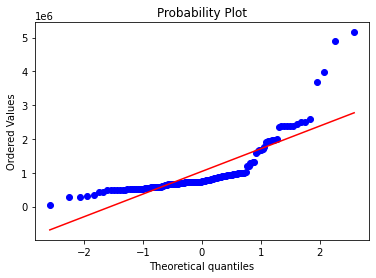

In [496]:
#histogram and normal probability plot
sns.distplot(final_housing_data['Price'], fit=norm)
fig = plt.figure()
res = stats.probplot(final_housing_data['Price'], plot=plt)

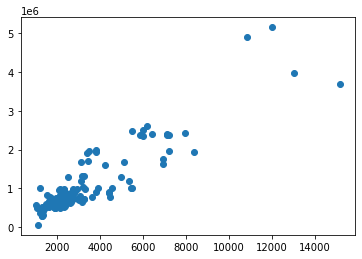

In [497]:
plt.scatter(final_housing_data['Sqft'], final_housing_data['Price'])

In [532]:
df = final_housing_data.groupby('No_bd').median()
df.hvplot.bar(y='Price', height=400)

:Bars   [No_bd]   (Price)

In [499]:
#removing outliers
final_housing_data = final_housing_data.drop(final_housing_data[final_housing_data['web-scraper-order']=='1641067270-92'].index)
final_housing_data = final_housing_data.drop(final_housing_data[final_housing_data['No_bd']==10].index)

In [501]:
final_housing_data.hvplot.scatter(x='Sqft', y='Price')

:Scatter   [Sqft]   (Price)

In [502]:
final_housing_data['Price'].describe()

count    1.410000e+02
mean     1.050968e+06
std      8.042002e+05
min      2.749000e+05
25%      6.200000e+05
50%      7.449900e+05
75%      9.990000e+05
max      5.160000e+06
Name: Price, dtype: float64

In [503]:
df = final_housing_data.groupby('City').median()
df.hvplot.bar(y='Price', height=400, rot=60)

:Bars   [City]   (Price)

In [504]:
df = final_housing_data.groupby('Year').median()
df.hvplot.bar(y='Price', height=400, rot=60)

:Bars   [Year]   (Price)

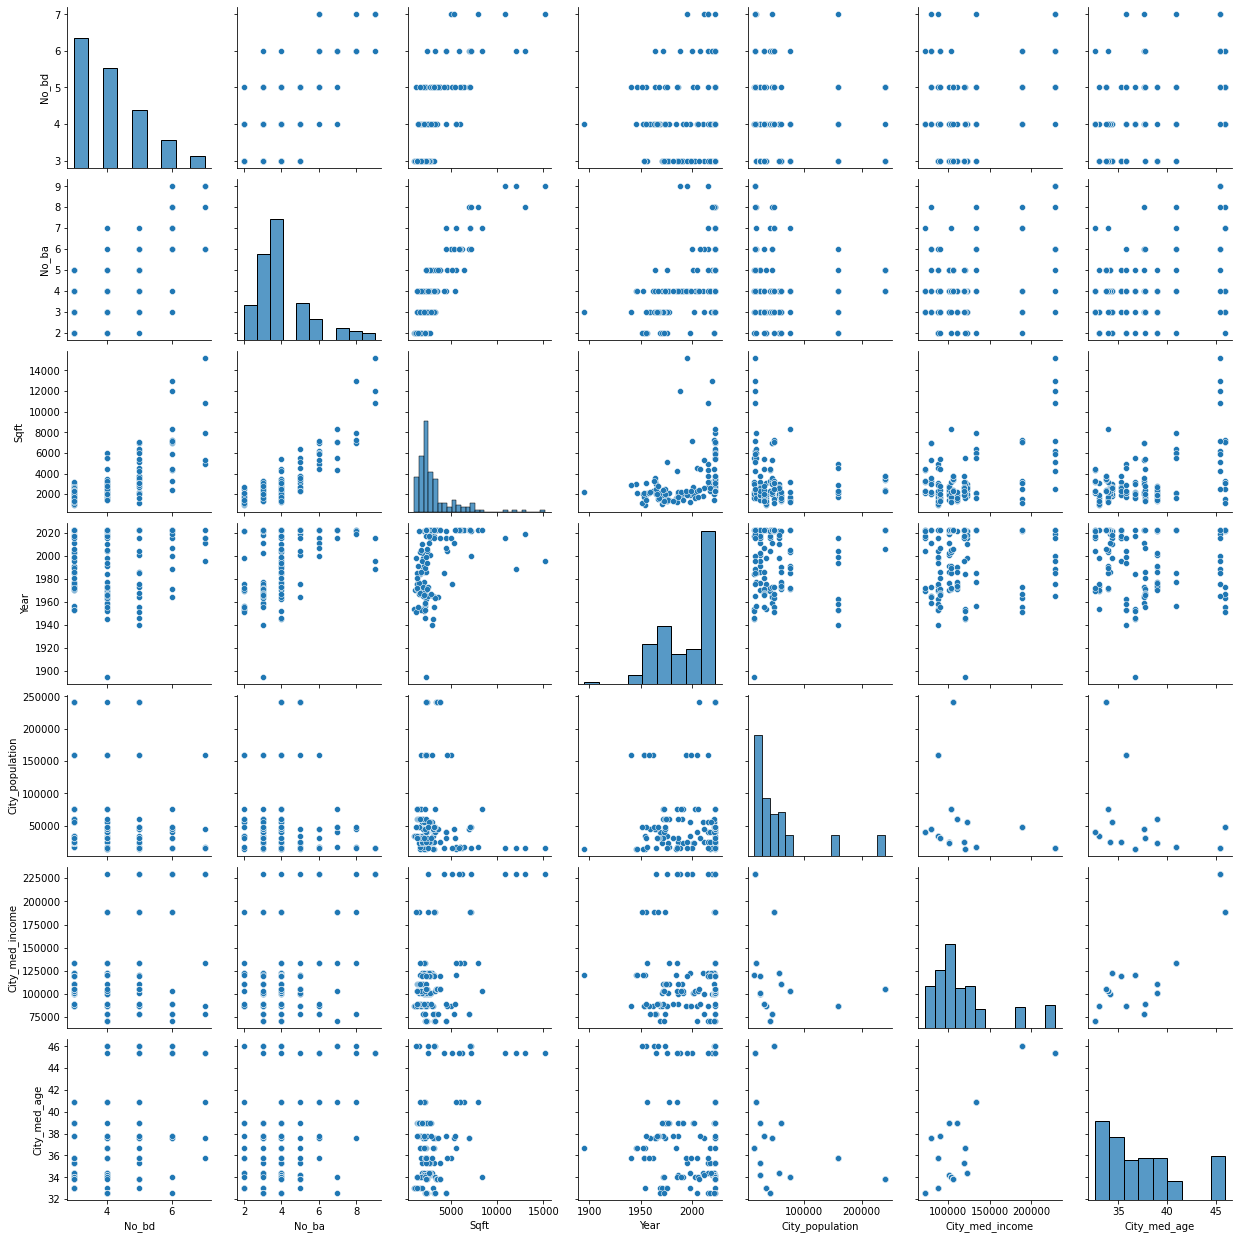

In [505]:
sns.pairplot(final_housing_data, vars=['No_bd', 'No_ba', 'Sqft', 'Year', 'City_population', 'City_med_income', 'City_med_age'])

<AxesSubplot:>

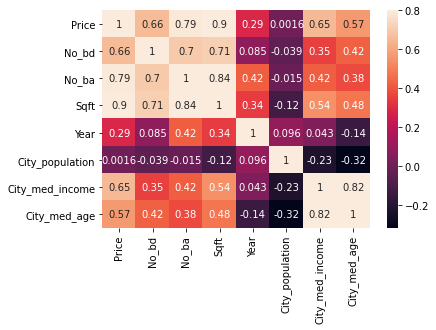

In [506]:
sns.heatmap(final_housing_data[['Price', 'No_bd', 'No_ba', 'Sqft', 'Year', 'City_population', 'City_med_income', 'City_med_age']].corr(), vmax=.8, annot=True)

In [205]:
# final_housing_data = pd.get_dummies(final_housing_data)

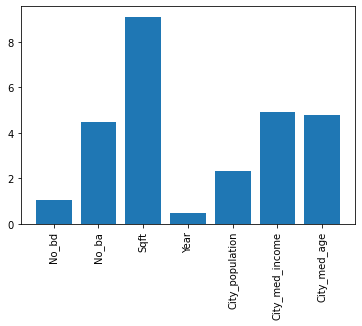

In [507]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from pandas import read_csv

#feature extraction

predictors = ['No_bd', 'No_ba', 'Sqft', 'Year', 'City_population', 'City_med_income', 'City_med_age']

test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(final_housing_data[predictors], final_housing_data['Price'])
#summarize scores
scores = -np.log10(test.pvalues_)
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()
#best features to use are Sqft, city_med_income, city_med_age, No_ba, city_population

In [508]:
X = final_housing_data[['No_ba', 'Sqft', 'City_med_income', 'City_med_age', 'City_population']]
Y = final_housing_data['Price']

In [509]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [510]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=10, scoring='r2')
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2 Square: ', r2_square)
    print('_________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [511]:
pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [512]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train, Y_train)

LinearRegression(normalize=True)

In [514]:
#Intercept: expected mean value of y when all x=0
print(lin_reg.intercept_)

1102336.081632653


In [515]:
#Coefficients: A unit increase of each will result in this much increase in Price
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
No_ba,97250.700828
Sqft,607999.633157
City_med_income,161754.434925
City_med_age,95955.083737
City_population,126293.507555


In [516]:
pred = lin_reg.predict(X_test)
pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y = 'Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [517]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n____________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
____________________
MAE:  172755.99368491545
MSE:  49259010610.12312
RMSE:  221943.7104540769
R2 Square:  0.7980027927364232
_________________________________
Train set evaluation:
_____________________
MAE:  206854.03018419532
MSE:  95256949587.04227
RMSE:  308637.2459490952
R2 Square:  0.8821455762211233
_________________________________


In [518]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_pred), cross_val(LinearRegression())]],
                         columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172755.993685,4.925901e+10,221943.710454,0.798003,0.238899


In [519]:
from sklearn.linear_model import RANSACRegressor

robust_reg = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
robust_reg.fit(X_train, Y_train)

test_pred = robust_reg.predict(X_test)
train_pred = robust_reg.predict(X_train)

print('Test set evaluation:\n____________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
____________________
MAE:  164506.37576621436
MSE:  53045270226.850555
RMSE:  230315.5883279518
R2 Square:  0.7824764177832766
_________________________________
Train set evaluation:
_____________________
MAE:  224847.44868576256
MSE:  119387346728.06667
RMSE:  345524.7411229284
R2 Square:  0.8522908090577863
_________________________________


In [520]:
pred = robust_reg.predict(X_test)
pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [521]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(Y_test, test_pred), cross_val(RANSACRegressor())]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172755.993685,4.925901e+10,221943.710454,0.798003,0.238899
1,Robust Regression,164506.375766,5.304527e+10,230315.588328,0.782476,-0.198198


In [522]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
ridge_reg.fit(X_train, Y_train)
pred = ridge_reg.predict(X_test)

test_pred = ridge_reg.predict(X_test)
train_pred = ridge_reg.predict(X_train)

print('Test set evaluation:\n____________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
____________________
MAE:  187561.21034221674
MSE:  69045275467.30833
RMSE:  262764.67697791563
R2 Square:  0.7168649421416835
_________________________________
Train set evaluation:
_____________________
MAE:  266522.19992209127
MSE:  171858018818.45035
RMSE:  414557.61821301794
R2 Square:  0.78737270228121
_________________________________


In [523]:
pred = ridge_reg.predict(X_test)
pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [524]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(Y_test, test_pred), cross_val(Ridge())]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172755.993685,4.925901e+10,221943.710454,0.798003,0.238899
1,Robust Regression,164506.375766,5.304527e+10,230315.588328,0.782476,-0.198198
2,Ridge Regression,187561.210342,6.904528e+10,262764.676978,0.716865,0.238884


In [525]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=42)
lasso_reg.fit(X_train, Y_train)

test_pred = lasso_reg.predict(X_test)
train_pred = lasso_reg.predict(X_train)

print('Test set evaluation:\n____________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
____________________
MAE:  172760.0074817572
MSE:  49259595138.5749
RMSE:  221945.0272895856
R2 Square:  0.798000395751316
_________________________________
Train set evaluation:
_____________________
MAE:  206855.6809435368
MSE:  95256949747.30513
RMSE:  308637.246208725
R2 Square:  0.8821455760228418
_________________________________


In [526]:
pred = lasso_reg.predict(X_test)
pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [527]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(Y_test, test_pred), cross_val(Lasso())]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172755.993685,4.925901e+10,221943.710454,0.798003,0.238899
1,Robust Regression,164506.375766,5.304527e+10,230315.588328,0.782476,-0.198198
2,Ridge Regression,187561.210342,6.904528e+10,262764.676978,0.716865,0.238884
3,Lasso Regression,172760.007482,4.925960e+10,221945.027290,0.798000,0.238898


In [528]:
from sklearn.linear_model import ElasticNet

elasticnet_reg = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
elasticnet_reg.fit(X_train, Y_train)

test_pred = elasticnet_reg.predict(X_test)
train_pred = elasticnet_reg.predict(X_train)

print('Test set evaluation:\n____________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
____________________
MAE:  174731.78320676627
MSE:  49476964883.60552
RMSE:  222434.18101453184
R2 Square:  0.7971090241850598
_________________________________
Train set evaluation:
_____________________
MAE:  207228.73434086764
MSE:  95361807736.75703
RMSE:  308807.0720316441
R2 Square:  0.8820158429379694
_________________________________


In [529]:
pred = elasticnet_reg.predict(X_test)
pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [530]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(Y_test, test_pred), cross_val(ElasticNet())]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172755.993685,4.925901e+10,221943.710454,0.798003,0.238899
1,Robust Regression,164506.375766,5.304527e+10,230315.588328,0.782476,-0.198198
2,Ridge Regression,187561.210342,6.904528e+10,262764.676978,0.716865,0.238884
3,Lasso Regression,172760.007482,4.925960e+10,221945.027290,0.798000,0.238898
4,Elastic Net Regression,174731.783207,4.947696e+10,222434.181015,0.797109,0.228293


In [531]:
results_df.hvplot.bar(x='Model', y='RMSE')
#linear regression best in terms of RMSE, ridge regression is the worst

:Bars   [Model]   (RMSE)

In [445]:
results_df.hvplot.bar(x='Model', y='RMSE')
results_df.hvplot.bar(x='Model', y='R2 Square')
#linear regression perform the same in terms of R2, ridge regression is the worst

:Bars   [Model]   (R2 Square)